---
title: Pseudorandom Number Generator
date: 2023-04-24
categories: Python
---

Pseudorandom number generator is a proxy for truly random number generator. It is not truly random because the numbers generated are determined by an initial value called `seed`. Therefore, the numbers generated are deterministic if we know the `seed`. The randomness comes from the value of the seed. In other words, if we set the seed to a fixed number such as `seed = 123`, then we can guarantee to generate the exact same sequence any time we set the seed to `123`. For example:

In [5]:
# | echo: false
import os
import random
import matplotlib.pyplot as plt
import numpy
import torch
import seaborn as sns
sns.set()

In [6]:
random.seed(123)
r1 = random.random()
random.seed(123)
r2 = random.random()
r1 == r2


True

There is no raltionship between the pseudorandom numbers generated, as the plot below shows:

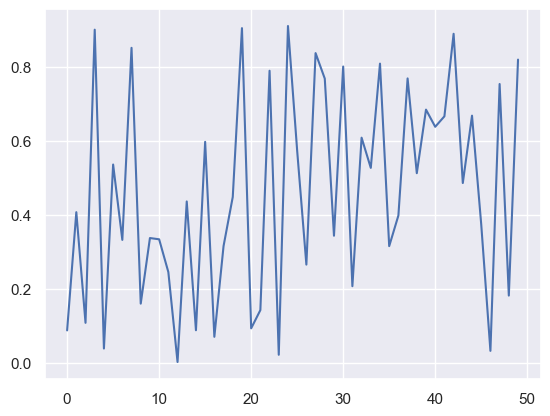

In [7]:
plt.plot([random.random() for _ in range(50)]);

Also, the pseudorandom numbers generated follow standard uniform distribution.

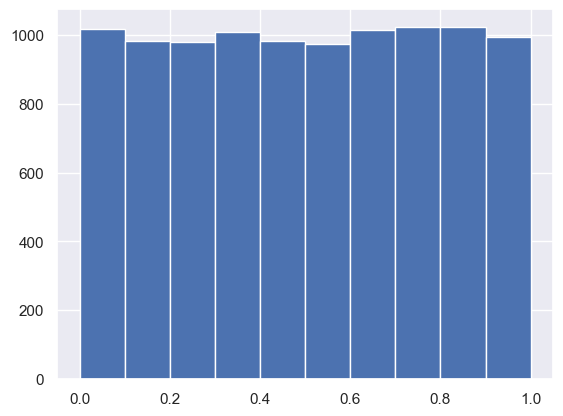

In [8]:
plt.hist([random.random() for _ in range(10000)]);

Simple implementation to set the `random_state` using the seed as well as generating random numbers that follow the standard uniform distribution:

In [14]:
rnd_state = None # starting value

def seed(a):
    "Set the random state"
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x) + 1, int(y) + 1, int(z) + 1

def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x, y, z
    return (x / 30269 + y / 30307 + z / 30323) % 1.0

Both `torch` and `numpy` fail at creating different random numbers in both the parent and the child processes because both processes have the same random_state, which is used to generate the random number.. But `Python` works fine because it takes care of changing the random_state in the child process(es) as the code segments below illustrates:

In [11]:
if os.fork():
    print(f"In parent: {torch.rand(1)}")
else:
    print(f"In child: {torch.rand(1)}")
    os._exit(os.EX_OK)

In parent: tensor([0.3910])
In child: tensor([0.3910])


In [12]:
if os.fork():
    print(f"In parent: {np.random.randn(1)}")
else:
    print(f"In child: {np.random.randn(1)}")
    os._exit(os.EX_OK)

In parent: [-0.51009584]
In child: [-0.51009584]


In [13]:
if os.fork():
    print(f"In parent: {random.random()}")
else:
    print(f"In child: {random.random()}")
    os._exit(os.EX_OK)

In parent: 0.6560074137612377
In child: 0.3243934113820527


As a result, we need to be careful when using multiprocessing/threading with pytorch and numpy that requires generating different random numbers in different threads/processes.